# Overfitting Model
The model is too complex and adapts perfectly on the training images but performs poorly on the test data.

The learning curve of the overfitting model will show that the accuracy on the training set is high and improving over time, while the accuracy on the validation set is lower and plateauing or even decreasing over time.

In [80]:
import numpy as np
import matplotlib.pyplot as plt

Found 5192 images belonging to 5 classes.
Found 2499 images belonging to 5 classes.


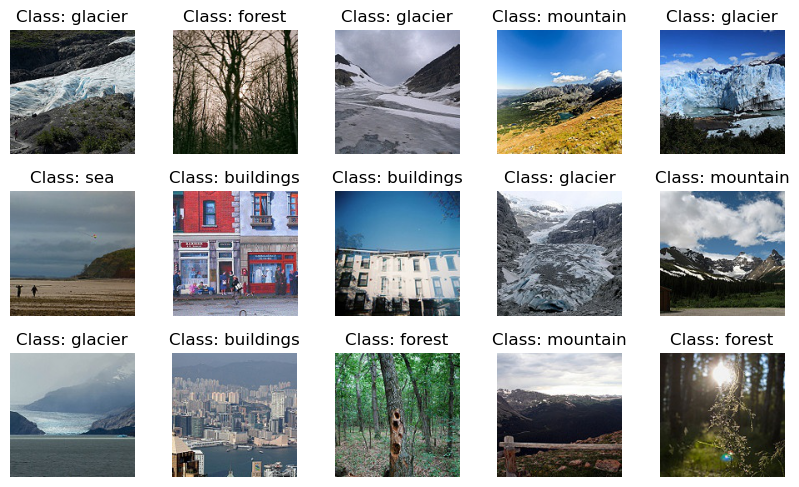

In [81]:
%run rueegg_wissiak_data_augmentation.ipynb

## Building the Model
The SparseCategoricalCrossentropy calculates the loss of a categorical model with labels provided as integer values. 

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(1024, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_130 (Conv2D)         (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 75, 75, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_131 (Conv2D)         (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 37, 37, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_132 (Conv2D)         (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_132 (MaxPooli  (None, 18, 18, 128)    

## Training the Model
Learnings: In each epoch all images are sent into the CNN and through backpropagation the weights get adapted. The output of the `model.fit()` process outputs e.g.
```
Epoch 1/20
35/163 [==============================]
```
which indicates that the CNN is currently training the 35th batch of 162 batches of the first epoch. If we use a batch_size of 32 we can then calculate the number of images included in the training step -> 163*32=5216.
The number of epochs defines how many times the CNN sees the **entire** dataset but in a different order.

Another outcome that we've encountered is that the `model.fit()` process needs at least 20 epochs to converge sufficiently so that the overfitting phenomenon is visible in the Loss and Accuracy graph.

In [84]:
history = model.fit(
    train_generator, 
    validation_data=test_generator,
    epochs=20,
)

Epoch 1/5
163/163 [==============================] - 186s 1s/step - loss: 1.2011 - accuracy: 0.4721 - val_loss: 1.0076 - val_accuracy: 0.5546
Epoch 2/5
  4/163 [..............................] - ETA: 2:52 - loss: 0.9997 - accuracy: 0.5547

KeyboardInterrupt: 

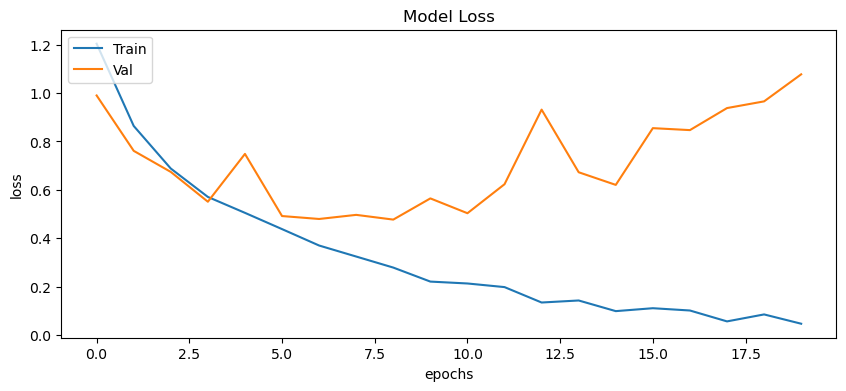

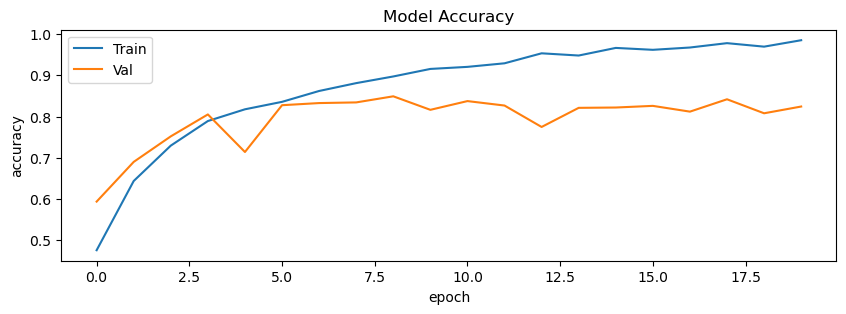

In [ ]:
%run rueegg_wissiak_model_visualization.ipynb

In [85]:
%run rueegg_wissiak_model_evaluation.ipynb

79/79 [==============================] - 13s 169ms/step
Predicted classes: [3 1 1 ... 0 3 2]
True labels: [0 0 0 ... 4 4 4]
Accuracy:
 0.19727891156462585
